In [1]:
### This notebook needs to be run in a tensorflow v1.14 virtual environment ###

import os
import gc
import cv2
import random

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
val_imgs_kodak = ['selfsupervised-denoising-master/datasets/kodak/{}'.format(i) for i in os.listdir('selfsupervised-denoising-master/datasets/kodak')] 

In [3]:
def read_and_process_image(list_of_images):
    imglist = [] # images
    
    for image in list_of_images:
        imglist.append(mpimg.imread(image))
    
    return imglist

In [4]:
val_imgs_kodak = read_and_process_image(val_imgs_kodak)

In [5]:
def plot_images(images, n_plots=5):
    fig, ax = plt.subplots(1, n_plots, figsize=(5*n_plots, 4))

    for i, a in zip(images, ax):
        a.imshow(i)
        a.axis('off')

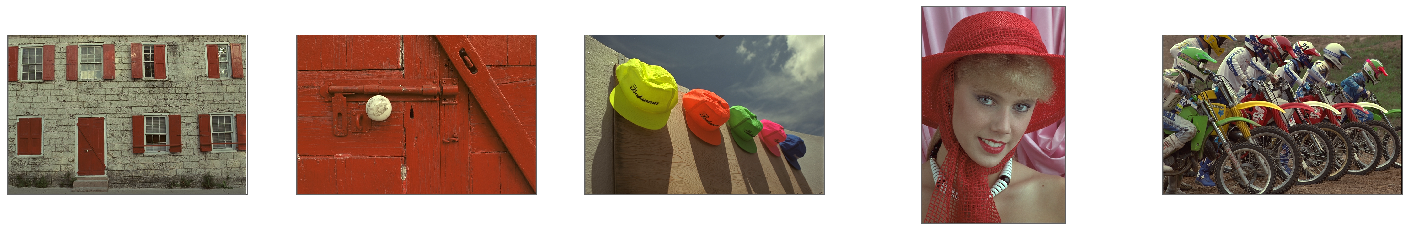

In [6]:
# Plot Kodak Validation Images
plot_images(val_imgs_kodak)

Prepare ILSVR ImageNet training dataset for paper's models. Training dataset will output to a `imagenet_train.h5` file.

In [7]:
!python selfsupervised-denoising-master\dataset_tool_h5.py --input-dir "C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val" --out="C:\pretrained\imagenet_train.h5"

Loading image list from C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val
loading images 0 / 50000
loading images 100 / 50000
loading images 200 / 50000
loading images 300 / 50000
loading images 400 / 50000
loading images 500 / 50000
loading images 600 / 50000
loading images 700 / 50000
loading images 800 / 50000
loading images 900 / 50000
loading images 1000 / 50000
loading images 1100 / 50000
loading images 1200 / 50000
loading images 1300 / 50000
loading images 1400 / 50000
loading images 1500 / 50000
loading images 1600 / 50000
loading images 1700 / 50000
loading images 1800 / 50000
loading images 1900 / 50000
loading images 2000 / 50000
loading images 2100 / 50000
loading images 2200 / 50000
loading images 2300 / 50000
loading images 2400 / 50000
loading images 2500 / 50000
loading images 2600 / 50000
loading images 2700 / 50000
loading images 2800 / 50000
loading images 2900 / 50000
loading images 3000 / 50000
loading images 3100 / 50000
loading images 3200 / 50000
loading images 

3951/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00029170.JPEG
3952/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00042513.JPEG
3953/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00038012.JPEG
3954/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00041053.JPEG
3955/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00026541.JPEG
3956/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00003230.JPEG
3957/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00048280.JPEG
3958/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00046352.JPEG
3959/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00016705.JPEG
3960/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00004269.JPEG
3961/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00004614.JPEG
3962/44328

8450/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00035058.JPEG
8451/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00038745.JPEG
8452/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00008109.JPEG
8453/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00048648.JPEG
8454/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00034360.JPEG
8455/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00048250.JPEG
8456/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00011958.JPEG
8457/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00049478.JPEG
8458/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00008181.JPEG
8459/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00002347.JPEG
8460/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00014644.JPEG
8461/44328

13346/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00014697.JPEG
13347/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00006904.JPEG
13348/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00003013.JPEG
13349/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00047776.JPEG
13350/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00040248.JPEG
13351/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00025839.JPEG
13352/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00020640.JPEG
13353/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00009514.JPEG
13354/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00037235.JPEG
13355/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00046047.JPEG
13356/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00021625.JPEG

17949/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00048946.JPEG
17950/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00003387.JPEG
17951/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00010829.JPEG
17952/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00047861.JPEG
17953/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00048306.JPEG
17954/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00035885.JPEG
17955/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00019837.JPEG
17956/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00046373.JPEG
17957/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00043681.JPEG
17958/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00023079.JPEG
17959/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00023336.JPEG

22949/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00043762.JPEG
22950/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00047285.JPEG
22951/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00015937.JPEG
22952/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00048110.JPEG
22953/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00028068.JPEG
22954/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00036173.JPEG
22955/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00010197.JPEG
22956/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00044689.JPEG
22957/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00005812.JPEG
22958/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00009053.JPEG
22959/44328: C:\Users\Jon Chiang\Downloads\ILSVRC2012_img_val\ILSVRC2012_val_00049705.JPEG

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Evaluating Gauss25-blindspot-sigma_global

In [8]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00014-gauss25-blindspot-sigma_global.pickle"

Creating the run dir: results\_eval\00014-eval-ilsvrc-kodak-3c-gauss25-mb1-iter20k-blindspot-global-EVAL_gauss25-blindspot-sigma_global
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00014-gauss25-blindspot-sigma_global.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 30.6677, valid_psnr_pme= 32.4350
Evaluation done, exiting.
RESULT  32.4350
dnnlib: Finished selfsupervised_denoising.train() in 2m 29s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Gauss5-50-blindspot-per_image

In [9]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00021-gauss5_50-blindspot-sigma_per_image.pickle"

Creating the run dir: results\_eval\00015-eval-ilsvrc-kodak-3c-gauss5_50-mb1-iter20k-blindspot-per_image-EVAL_gauss5_50-blindspot-sigma_per_image
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00021-gauss5_50-blindspot-sigma_per_image.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 30.4362, valid_psnr_pme= 32.4559
Evaluation done, exiting.
RESULT  32.4559
dnnlib: Finished selfsupervised_denoising.train() in 2m 44s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Gauss5-50-N2N

In [10]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00019-gauss5_50-n2n.pickle"

Creating the run dir: results\_eval\00016-eval-ilsvrc-kodak-3c-gauss5_50-mb1-iter20k-n2n-EVAL_gauss5_50-n2n
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00019-gauss5_50-n2n.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 32.5652, valid_psnr_pme= 32.5652
Evaluation done, exiting.
RESULT  32.5652
dnnlib: Finished selfsupervised_denoising.train() in 1m 01s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Gauss5-50-N2C

In [11]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00018-gauss5_50-n2c.pickle"

Creating the run dir: results\_eval\00017-eval-ilsvrc-kodak-3c-gauss5_50-mb1-iter20k-n2c-EVAL_gauss5_50-n2c
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00018-gauss5_50-n2c.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 32.5746, valid_psnr_pme= 32.5746
Evaluation done, exiting.
RESULT  32.5746
dnnlib: Finished selfsupervised_denoising.train() in 1m 01s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Poiss30-blindspot-sigma_global

In [12]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00033-poisson30-blindspot-sigma_global.pickle"

Creating the run dir: results\_eval\00018-eval-ilsvrc-kodak-3c-poisson30-mb1-iter2m-blindspot-global-EVAL_poisson30-blindspot-sigma_global
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00033-poisson30-blindspot-sigma_global.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 30.1498, valid_psnr_pme= 31.7050
Evaluation done, exiting.
RESULT  31.7050
dnnlib: Finished selfsupervised_denoising.train() in 2m 40s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Poiss5-50-blindspot-per_image

In [13]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00038-poisson5_50-blindspot-sigma_per_image.pickle"

Creating the run dir: results\_eval\00019-eval-ilsvrc-kodak-3c-poisson5_50-mb1-iter20k-blindspot-per_image-EVAL_poisson5_50-blindspot-sigma_per_image
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00038-poisson5_50-blindspot-sigma_per_image.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 29.6749, valid_psnr_pme= 31.0234
Evaluation done, exiting.
RESULT  31.0234
dnnlib: Finished selfsupervised_denoising.train() in 2m 58s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Poiss5-50-N2N

In [14]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00036-poisson5_50-n2n.pickle"

Creating the run dir: results\_eval\00020-eval-ilsvrc-kodak-3c-poisson5_50-mb1-iter20k-n2n-EVAL_poisson5_50-n2n
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00036-poisson5_50-n2n.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 31.3221, valid_psnr_pme= 31.3221
Evaluation done, exiting.
RESULT  31.3221
dnnlib: Finished selfsupervised_denoising.train() in 1m 10s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Poiss5-50-N2C

In [15]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00035-poisson5_50-n2c.pickle"

Creating the run dir: results\_eval\00021-eval-ilsvrc-kodak-3c-poisson5_50-mb1-iter20k-n2c-EVAL_poisson5_50-n2c
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00035-poisson5_50-n2c.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 31.3297, valid_psnr_pme= 31.3297
Evaluation done, exiting.
RESULT  31.3297
dnnlib: Finished selfsupervised_denoising.train() in 1m 10s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Impulse50-blindspot-sigma_global

In [16]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00053-impulse50-blindspot-sigma_global.pickle"

Creating the run dir: results\_eval\00022-eval-ilsvrc-kodak-3c-impulse50-mb1-iter4m-blindspot-global-EVAL_impulse50-blindspot-sigma_global
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00053-impulse50-blindspot-sigma_global.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 30.8853, valid_psnr_pme= 32.9263
Evaluation done, exiting.
RESULT  32.9263
dnnlib: Finished selfsupervised_denoising.train() in 2m 25s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Impulse100-blindspot-sigma_per_image

In [17]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00058-impulse0_100-blindspot-sigma_per_image.pickle"

Creating the run dir: results\_eval\00023-eval-ilsvrc-kodak-3c-impulse0_100-mb1-iter4m-blindspot-per_image-EVAL_impulse0_100-blindspot-sigma_per_image
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00058-impulse0_100-blindspot-sigma_per_image.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 28.3505, valid_psnr_pme= 31.3991
Evaluation done, exiting.
RESULT  31.3991
dnnlib: Finished selfsupervised_denoising.train() in 2m 44s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Impulse0-100-N2N

In [18]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00056-impulse0_100-n2n.pickle"

Creating the run dir: results\_eval\00024-eval-ilsvrc-kodak-3c-impulse0_100-mb1-iter16m-n2n-EVAL_impulse0_100-n2n
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00056-impulse0_100-n2n.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 31.5262, valid_psnr_pme= 31.5262
Evaluation done, exiting.
RESULT  31.5262
dnnlib: Finished selfsupervised_denoising.train() in 1m 02s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Evaluating Impulse0-100-N2C

In [19]:
!python selfsupervised-denoising-master\selfsupervised_denoising.py --dataset-dir=selfsupervised-denoising-master\datasets --validation-set=kodak --eval="C:/pretrained/network-00055-impulse0_100-n2c.pickle"

Creating the run dir: results\_eval\00025-eval-ilsvrc-kodak-3c-impulse0_100-mb1-iter16m-n2c-EVAL_impulse0_100-n2c
Copying files to the run dir
dnnlib: Running selfsupervised_denoising.train() on localhost...
Not loading training data.
Loading validation dataset from 'selfsupervised-denoising-master\datasets\kodak\*.png'.
Loaded 24 images.
Validation image padded size = [768, 768].
Repeating the validation set 10 times.
Evaluating network 'C:/pretrained/network-00055-impulse0_100-n2c.pickle'.
Evaluating network with 240 images.
       0: time=  0.00, loss=  0.0000, train_psnr=  0.0000, train_psnr_pme=  0.0000, std_net=  0.0000, std_noise=  0.0000, valid_psnr_mu= 31.6891, valid_psnr_pme= 31.6891
Evaluation done, exiting.
RESULT  31.6891
dnnlib: Finished selfsupervised_denoising.train() in 1m 03s.


C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf14-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P